
<h1 style=" text-align:center; color:Red; font-size:40px; display: block;"> <u><b><i>Malaria Image Clasification with CNN, ResNet and VGG16 🦟🦟</i></b></u> </h1>
<p style="text-align:center; ">
<img src="https://cdn-prod.medicalnewstoday.com/content/images/articles/150/150670/malaria-is-passed-on-by-the-anopheles-mosquito.jpg" style='width: 400px;'>
</p>


# Importing The Modules

In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras.applications import resnet50
from keras.models import *
from keras.layers import *
import keras
import warnings
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg19 import VGG19

warnings.filterwarnings('ignore')



# Reading The File Names

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C236ThinF_IMG_20151127_102516_cell_177.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfecte

# Data Preparation

In [3]:
def data_prep(parasitized,uninfected):

    parasitized= ["../input/cell-images-for-detecting-malaria/cell_images/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["../input/cell-images-for-detecting-malaria/cell_images/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})


df = data_prep(os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'), os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/'))
df.head()

Image_Path       Labels
0  ../input/cell-images-for-detecting-malaria/cel...  parasitized
1  ../input/cell-images-for-detecting-malaria/cel...  parasitized
2  ../input/cell-images-for-detecting-malaria/cel...  parasitized
3  ../input/cell-images-for-detecting-malaria/cel...  parasitized
4  ../input/cell-images-for-detecting-malaria/cel...  parasitized

# Displaying 5 Images For Each Of The Two Labels

Displaying 5 Parasitized Images: 



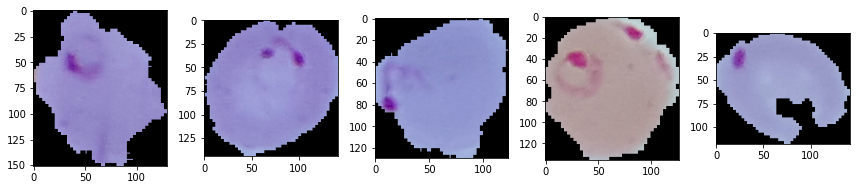


Displaying 5 Uninfected Images: 



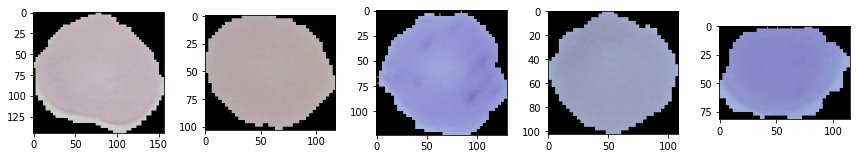

In [41]:

print("Displaying 5 Parasitized Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


print()
print("Displaying 5 Uninfected Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


# Distribution Of Samples

Text(0.5, 1.0, 'Distribution of samples according to the categories')

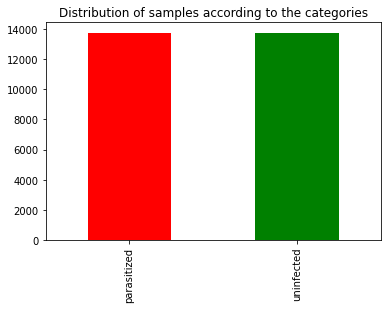

In [4]:
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of samples according to the categories')

# 

# Augmenting The Data

In [5]:

train, test = train_test_split(df, test_size = .20)

img_datagen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest', validation_split=0.2)
                               
                               
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [6]:
def plot_loss_and_accuracy(mo_fit):
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']



    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')



    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()


# Building CNN

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 24s 231ms/step - loss: 2.9753 - accuracy: 0.4968 - val_loss: 0.6775 - val_accuracy: 0.5740
Epoch 2/10
100/100 [==============================] - 22s 223ms/step - loss: 0.5876 - accuracy: 0.7175 - val_loss: 0.4043 - val_accuracy: 0.9000
Epoch 3/10
100/100 [==============================] - 22s 217ms/step - loss: 0.3178 - accuracy: 0.8943 - val_loss: 0.2642 - val_accuracy: 0.9260
Epoch 4/10
100/100 [==============================] - 22s 225ms/step - loss: 0.2920 - accuracy: 0.8951 - val_loss: 0.2901 - val_accuracy: 0.9120
Epoch 5/10
100/100 [==============================] - 22s 225ms/step - loss: 0.3050 - accuracy: 0.9045 - val_loss: 0.3572 - val_accuracy: 0.8750


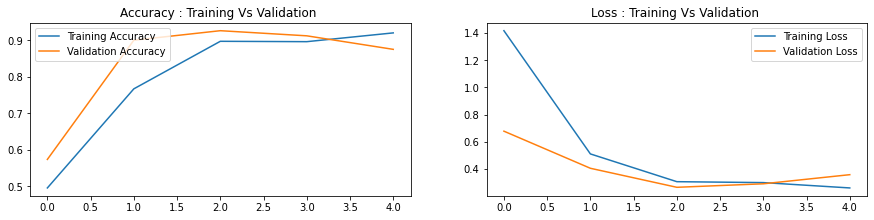

In [7]:
def cnn_model(df, train, test, my_callbacks):
    
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    model_history = model.fit_generator(generator = x_train, 
                   steps_per_epoch = 100,
                   epochs = 10 ,
                   validation_data = x_test,
                   validation_steps = 100, callbacks=my_callbacks)
    
    return model_history

    
plot_loss_and_accuracy(cnn_model(df, train, test, my_callbacks))


# Building ResNet50

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 119s 1s/step - loss: 0.6635 - accuracy: 0.7648 - val_loss: 2.6405 - val_accuracy: 0.7800
Epoch 2/10
100/100 [==============================] - 103s 1s/step - loss: 0.4318 - accuracy: 0.8738 - val_loss: 1.2281 - val_accuracy: 0.9100
Epoch 3/10
100/100 [==============================] - 101s 1s/step - loss: 0.4011 - accuracy: 0.8821 - val_loss: 1.4353 - val_accuracy: 0.9260
Epoch 4/10
100/100 [==============================] - 102s 1s/step - loss: 0.2391 - accuracy: 0.9192 - val_loss: 0.7051 - val_accuracy: 0.9000
Epoch 5/10
100/100 [==============================] - 101s 1s/step - loss: 0.5393 - accuracy: 0.9061 - val_loss: 1.1074 - val_accuracy: 0.9250
Epoch 6/10
100/100 [==============================] - 100s 1s/step - loss: 0.3294 - accuracy: 0.9120 - val_loss: 3.9426 - val_accuracy: 0.9440


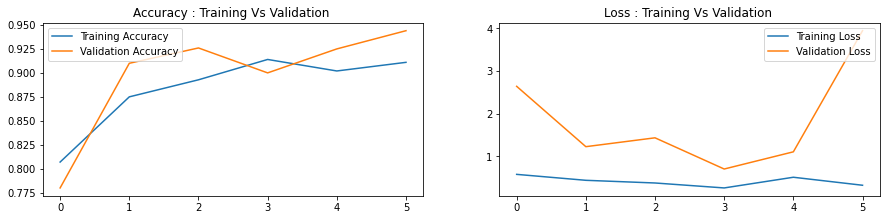

In [8]:
def resnet_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    resnet_model=resnet50.ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))
    model=Sequential()
    model.add(resnet_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100,
    epochs = 10, callbacks=my_callbacks)
    
    
    return model_history
    
plot_loss_and_accuracy(resnet_model(df, train, test, my_callbacks))

# Building VGG 19

Found 17638 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 1539s 15s/step - loss: 1.7930 - accuracy: 0.5231 - val_loss: 1.1653 - val_accuracy: 0.5280
Epoch 2/4
100/100 [==============================] - 1531s 15s/step - loss: 0.5468 - accuracy: 0.7552 - val_loss: 0.6924 - val_accuracy: 0.5090
Epoch 3/4
100/100 [==============================] - 1528s 15s/step - loss: 0.6985 - accuracy: 0.4933 - val_loss: 0.6934 - val_accuracy: 0.4860
Epoch 4/4
100/100 [==============================] - 1528s 15s/step - loss: 0.6929 - accuracy: 0.5189 - val_loss: 0.6935 - val_accuracy: 0.4860


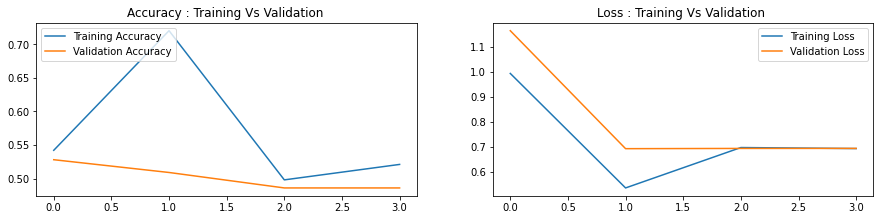

In [10]:
def vgg19_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(224,224,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100,
    epochs = 4 , callbacks=my_callbacks)
    
    return model_history
    
plot_loss_and_accuracy(vgg19_model(df, train, test, my_callbacks))

# Conclusion

> **It can be seen ResNet40 is performing the best in all the 3 models worked on here.**

> **VGG19 is performing badly.**